<a href="https://colab.research.google.com/github/w114050009-maker/MathAnalysisDataSci/blob/main/DataSciMath_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


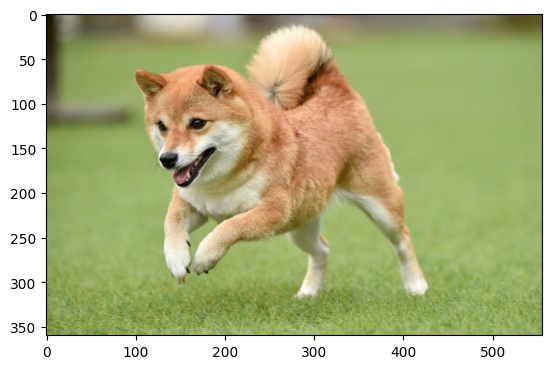

In [23]:
#img = mpimg.imread("/content/drive/MyDrive/picture/shiba.jpg")
img = mpimg.imread("/content/drive/MyDrive/Colab Notebooks/mathAnalysis/picture/shiba.jpg")

plt.imshow(img)
#plt.axis('off')  # 隱藏座標軸
#plt.show()

image dim = (360, 556)


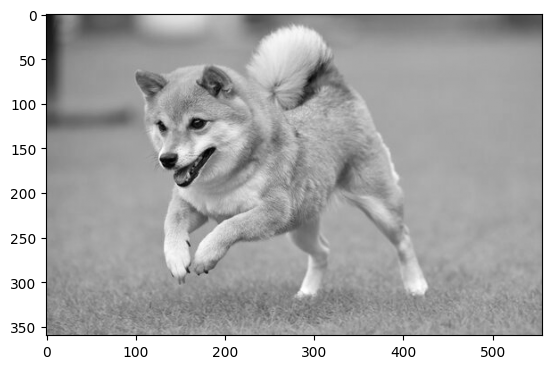

In [41]:
arr_shiba = np.array(img)

# Use luminosity method to get gray image
img_gray = np.dot(arr_shiba[..., :3], [0.299, 0.587, 0.114])
plt.imshow(img_gray, cmap='gray')
#plt.axis('off')  # 隱藏座標軸
#plt.show(
print("image dim =", img_gray.shape)

In [25]:
# 2-norm
def norm2(a, ak):
  return np.linalg.norm(a - ak, 2)

In [26]:
# MSE
def mse(image, image_svd):
  return np.mean((image/1.0 - image_svd/1.0) ** 2)

In [27]:
def gen_svd_pic(image, k, rgb):
  u, sigma, v = np.linalg.svd(image, full_matrices=False)

  # Method 1
  p = min(image.shape[0], image.shape[1]) #p=min(row_size ,colume_size)
  #print("image size =", image.shape)
  #print("p= ", p)

  if k > p:
    k = p

  # Method 2
  #k = min(len(sigma)-1, k)
  #print("k=",k)

  # k = 0 ~ k-1
  Ak = np.dot(u[:,:k], np.dot(np.diag(sigma[:k]), v[:k,:]))

  norm = norm2(image, Ak)

  m = mse(image, Ak)

  # 0 ~ 255
  Ak[Ak < 0] = 0
  Ak[Ak > 255] = 255

  Ak = np.rint(Ak).astype('uint8')

  return Ak, sigma, norm, sigma[k], m

In [38]:
def psnr(image, image_svd):
  m = mse(image, image_svd)
  if m < 1e-10:
    return 100
  else:
    return 10 * math.log10(255.0**2 / m) #2**8-1

In [37]:
def compression_rate(img, img_svd, k):
  # compress ratio = (m * n) / k * (m + n + 1)
  size_img = img.shape[0] * img.shape[1]
  size_img_svd = (img_svd.shape[0] + img_svd.shape[1] + 1) * k

  return (size_img / size_img_svd)

In [30]:
def showLinear(table, resize):
  fig, axs = plt.subplots(2, 2, figsize=(12, 10))

  # Plot 1: Sigma k+1
  axs[0, 0].plot(table[:, 0], table[:, 2], 's-', color='green', label="Sigma k+1")
  axs[0, 0].set_xlabel("k", fontsize=20, labelpad=10)
  axs[0, 0].set_ylabel("Sigma k+1", fontsize=20, labelpad=10)
  axs[0, 0].legend(loc="best", fontsize=15)

  # Plot 2: MSE / resize
  axs[0, 1].plot(table[:, 0], table[:, 3], 's-', color='blue', label="MSE")
  axs[0, 1].set_xlabel("k", fontsize=20, labelpad=10)
  axs[0, 1].set_ylabel("MSE", fontsize=20, labelpad=10)
  axs[0, 1].legend(loc="best", fontsize=15)

  # Plot 3: Compression Ratio
  axs[1, 0].plot(table[:, 0], table[:, 4], 's-', color='orange', label="CR")
  axs[1, 0].set_xlabel("k", fontsize=20, labelpad=10)
  axs[1, 0].set_ylabel("CR", fontsize=20, labelpad=10)
  axs[1, 0].legend(loc="best", fontsize=15)

  # Plot 4: PSNR
  axs[1, 1].plot(table[:, 0], table[:, 5], 's-', color='red', label="PSNR")
  axs[1, 1].set_xlabel("k", fontsize=20, labelpad=10)
  axs[1, 1].set_ylabel("PSNR", fontsize=20, labelpad=10)
  axs[1, 1].legend(loc="best", fontsize=15)

  plt.tight_layout()
  plt.show()

**Gray**

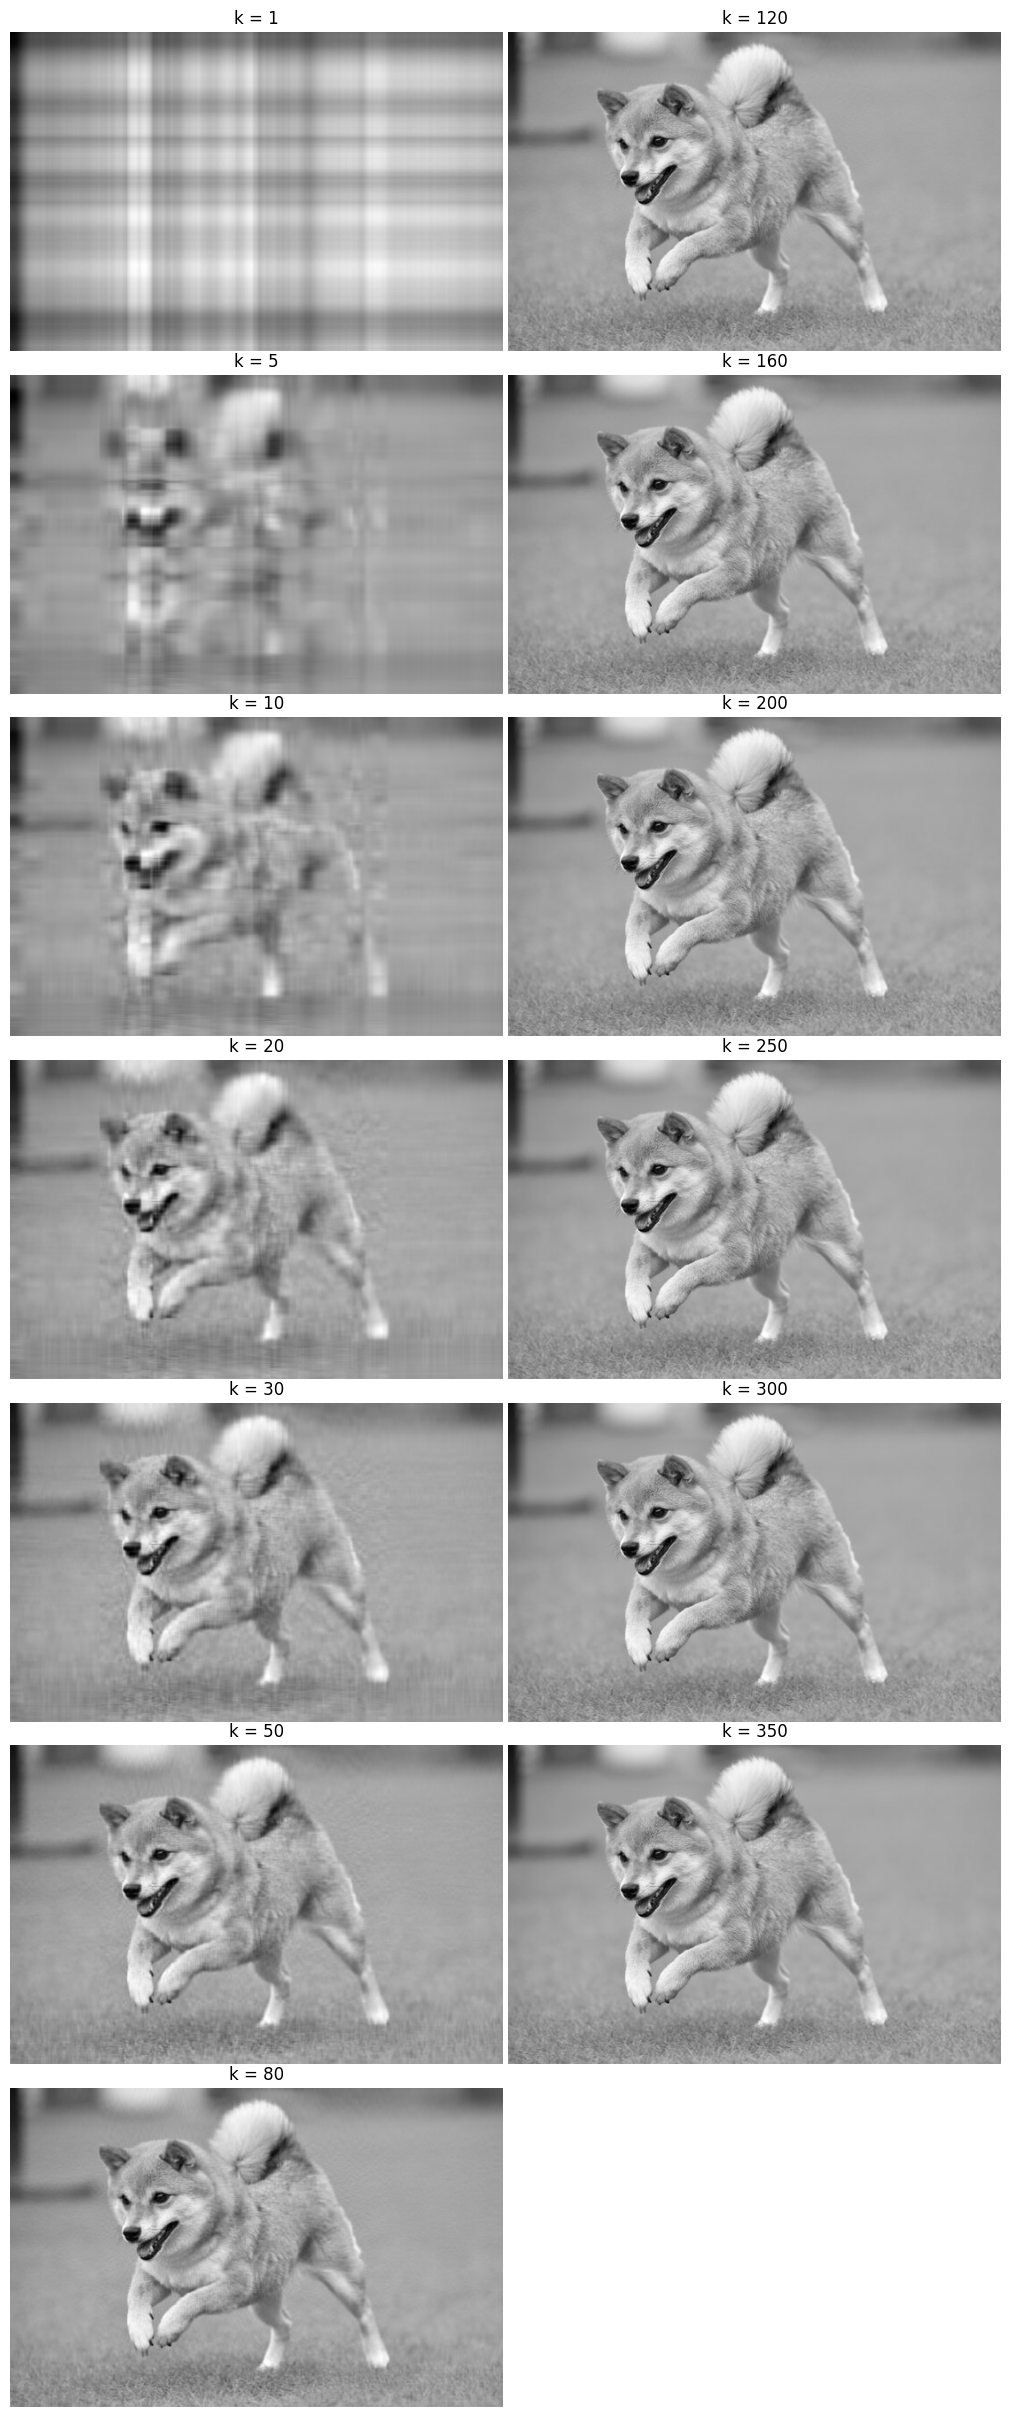

In [44]:
list_k = [1, 5, 10, 20, 30, 50, 80, 120, 160, 200, 250, 300, 350, 400]

list_feature = ["K", "2-norm", "sigma k+1", "CR", "MSE", "PSNR"]

# Use the grayscale image for SVD
img_gen = []
data = []
#fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 8))
# Limit the range of k to the smaller dimension of the image (360)
max_k = min(img_gray.shape)
valid_list_k = [k for k in list_k if k <= max_k]


fig, axes = plt.subplots(7, 2, figsize=(10, 24))

for i in valid_list_k:
  img_svd, sigma, norm, sigma_k1, m = gen_svd_pic(img_gray, i, "gray")
  img_gen.append(img_svd)
  # Handle the case where sigma_kp1 is None
  data.append([i, norm, sigma_k1, compression_rate(img_gray, img_svd, i),
        m, psnr(img_gray, img_svd)])


for i, ax in enumerate(axes.flat):
  if i < len(img_gen): # Ensure we don't go out of bounds of img_gen
    row = i % 7       # 先填第一列，再第二列
    col = i // 7      # 每列從左到右
    ax = axes[row, col]
    ax.imshow(img_gen[i], cmap='gray') # Add cmap='gray' here
    ax.set_title(f'k = {valid_list_k[i]}')
    ax.axis('off')  # 隱藏座標軸
    #plt.show()
  else:
    fig.delaxes(ax) # Remove unused subplots
plt.tight_layout(pad=0.1)
#plt.subplots_adjust(wspace=0.1, hspace=0.2)
#plt.axis('off')
plt.show()

In [32]:
table = pd.DataFrame(data, columns=list_feature)
table

K       2-norm    sigma k+1          CR         MSE       PSNR
0     1  5248.641845  5248.641845  218.276990  610.818733  20.270729
1     5  2644.896875  2644.896875   43.655398  235.812877  24.403622
2    10  1501.351642  1501.351642   21.827699  126.380439  27.110482
3    20   803.501074   803.501074   10.913850   56.450927  30.607098
4    30   527.011093   527.011093    7.275900   34.387460  32.757962
5    50   319.576871   319.576871    4.365540   17.317560  35.726762
6    80   198.404199   198.404199    2.728462    7.577533  39.289082
7   120   117.137507   117.137507    1.818975    2.714863  43.660521
8   160    71.768429    71.768429    1.364231    0.898904  48.222684
9   200    41.474395    41.474395    1.091385    0.249057  53.130139
10  250    16.772251    16.772251    0.873108    0.034278  60.121413
11  300     6.182325     6.182325    0.727590    0.005444  62.210069
12  350     2.803471     2.803471    0.623649    0.000292  62.421264

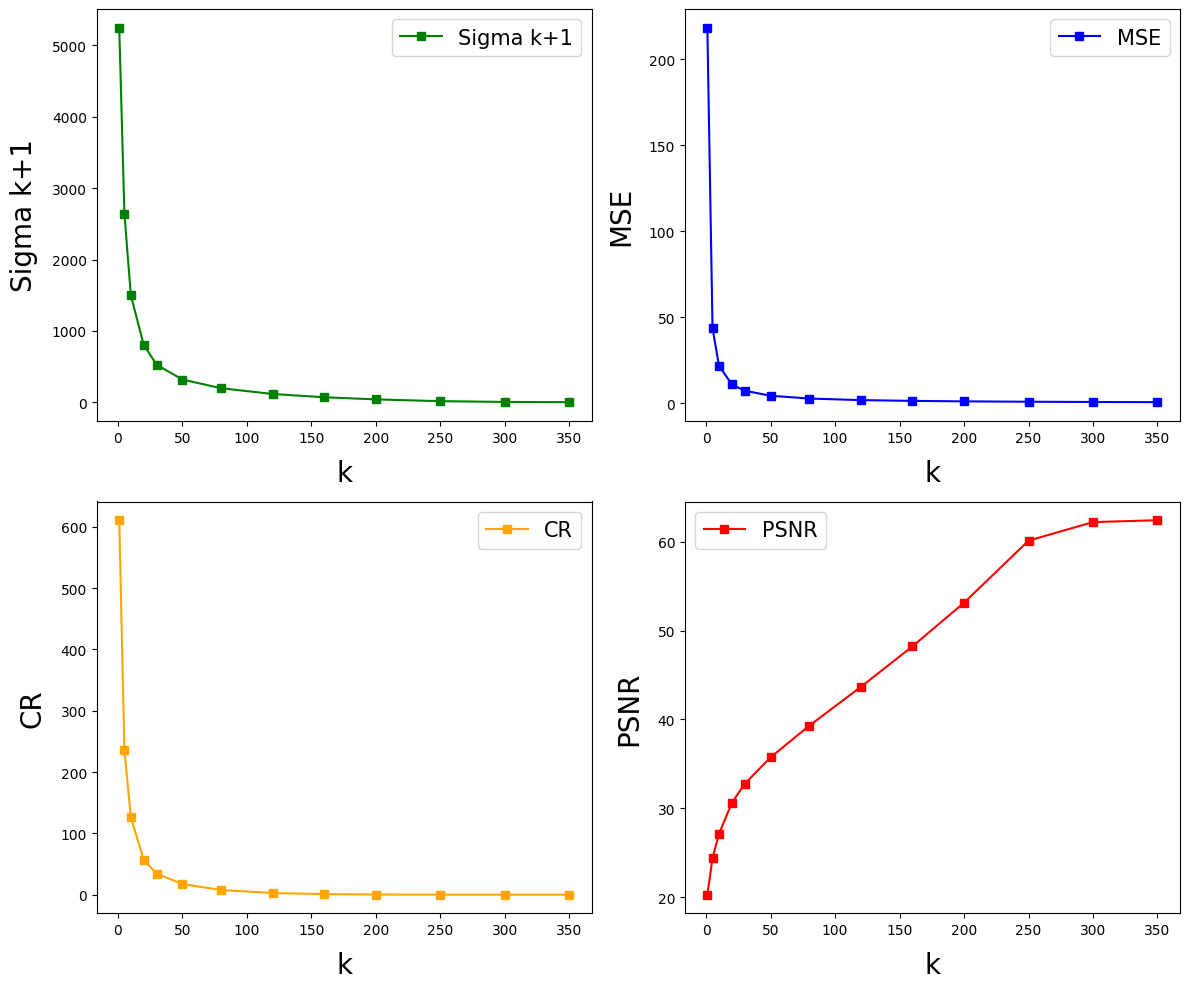

In [33]:
showLinear(table.values, 50)

**Color(RGB) - 3 Layers**

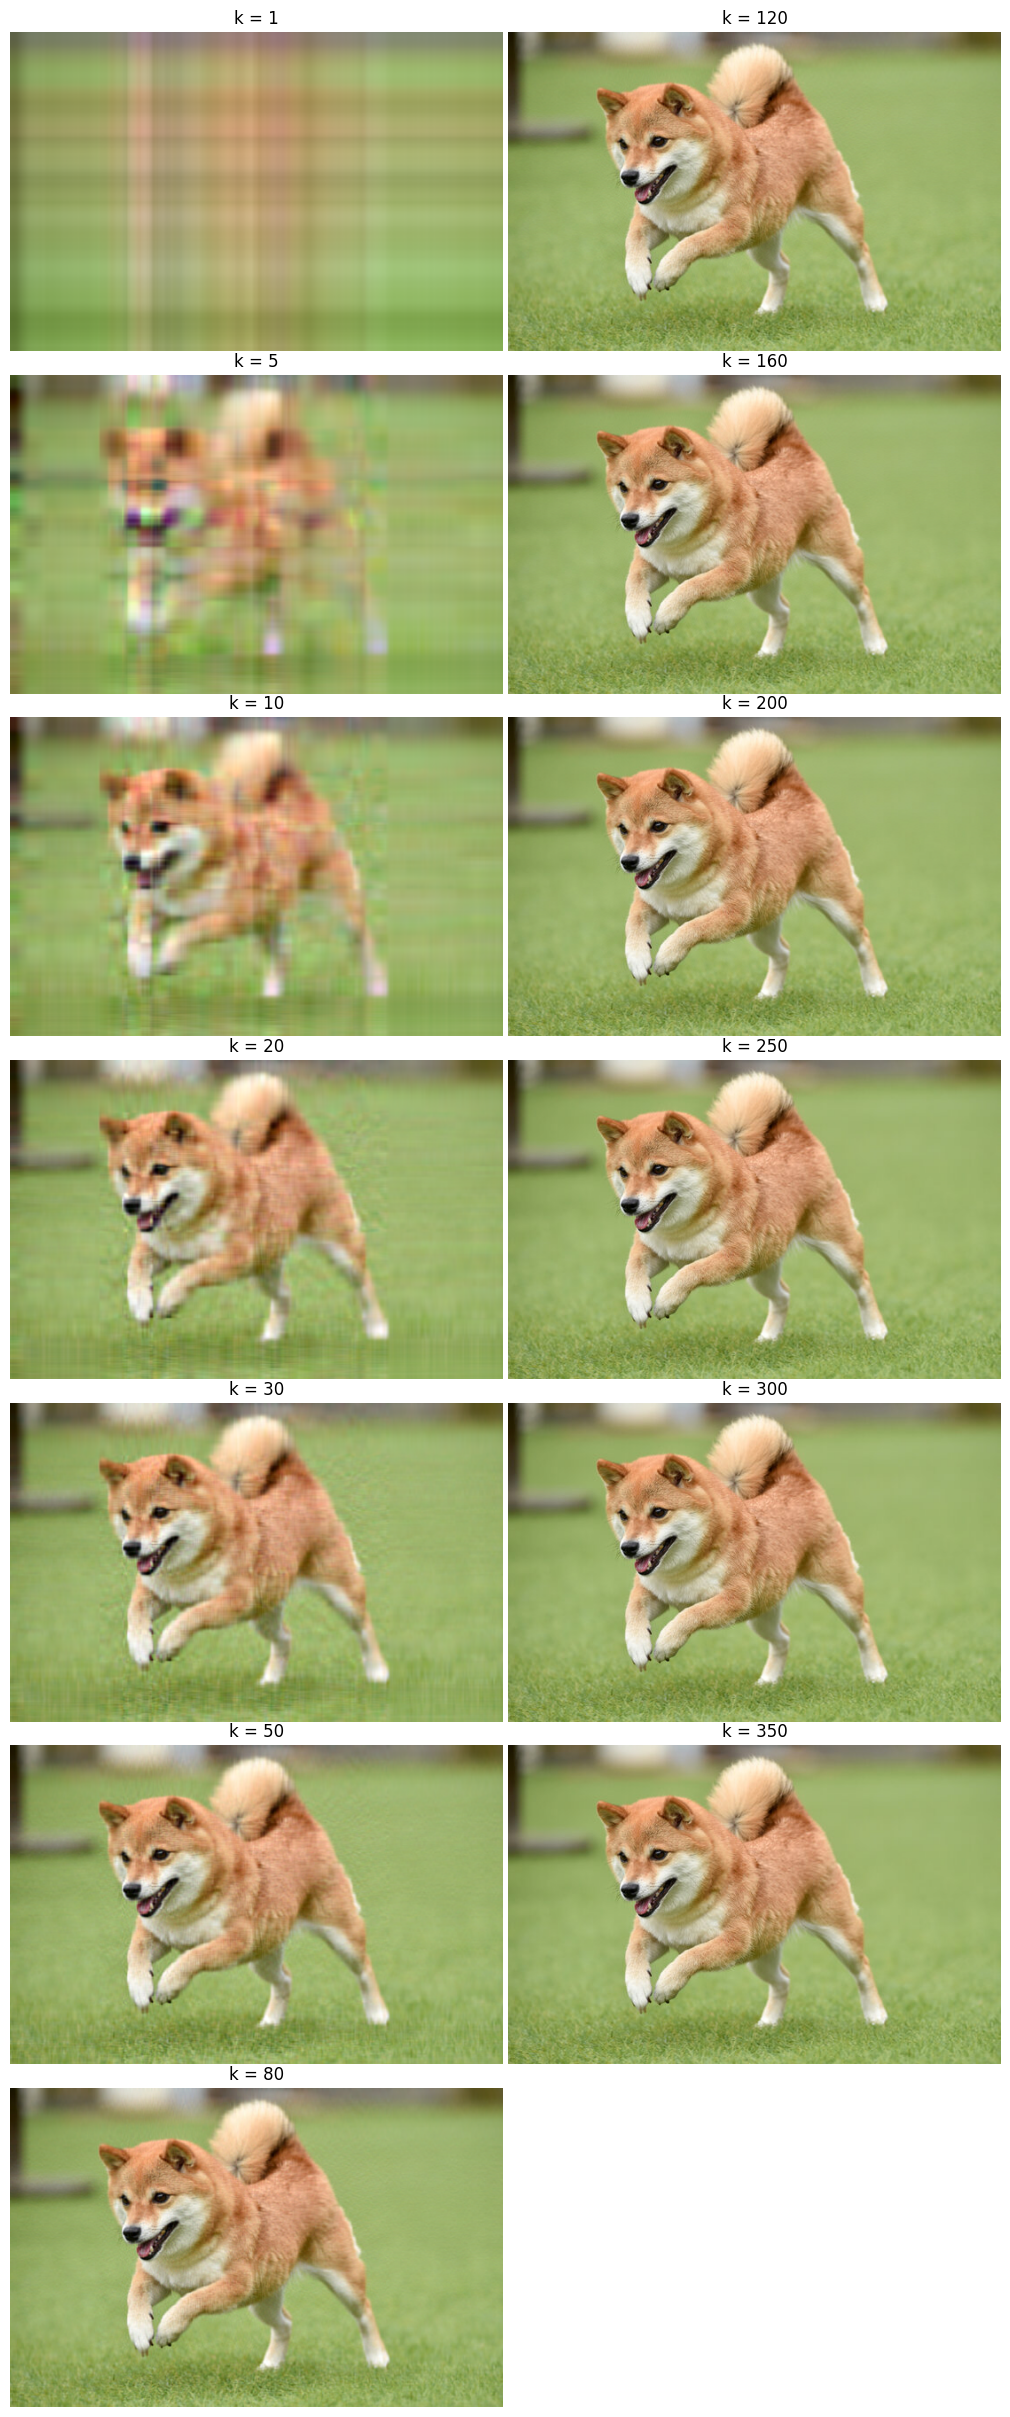

In [47]:
fig, axes = plt.subplots(7, 2, figsize=(10, 24))

img_gen = [] # Clear img_gen before processing RGB images
data = [] # Clear data before processing RGB images

for i in valid_list_k:
  R, sigma_R, norm_R, sigmak1_R, m_R = gen_svd_pic(arr_shiba[:,:,0],i,"R")
  G, sigma_G, norm_G, sigmak1_G, m_G = gen_svd_pic(arr_shiba[:,:,1],i,"G")
  B, sigma_B, norm_B, sigmak1_B, m_B = gen_svd_pic(arr_shiba[:,:,2],i,"B")

  img_rgb_svd = np.dstack((R, G, B))
  img_gen.append(img_rgb_svd)

  # Calculate average norm, sigma_k1, and mse for the RGB image
  avg_norm = (norm_R + norm_G + norm_B) / 3
  avg_sigmak1 = (sigmak1_R + sigmak1_G + sigmak1_B) / 3
  avg_m = (m_R + m_G + m_B) / 3

  data.append([i, avg_norm, avg_sigmak1, compression_rate(arr_shiba, img_rgb_svd, i),
        avg_m, psnr(arr_shiba, img_rgb_svd)])

for i, ax in enumerate(axes.flat):
  if i < len(img_gen):
    row = i % 7       # from row 1 to 7
    col = i // 7      # from column 0 to 1
    ax = axes[row, col]
    ax.imshow(img_gen[i])
    ax.set_title(f'k = {valid_list_k[i]}')
    ax.axis('off')  # 隱藏座標軸
  else:
    fig.delaxes(ax) # Remove unused subplots
plt.tight_layout(pad=0.1)
plt.show()

In [35]:
table = pd.DataFrame(data, columns=list_feature)
table

K       2-norm    sigma k+1          CR         MSE        PSNR
0     1  5748.211478  5748.211478  218.276990  708.931819   19.624382
1     5  2823.730234  2823.730234   43.655398  279.143401   23.672363
2    10  1606.543097  1606.543097   21.827699  144.265316   26.541010
3    20   868.364397   868.364397   10.913850   64.374247   30.040537
4    30   566.839002   566.839002    7.275900   38.834692   32.234487
5    50   338.306631   338.306631    4.365540   18.899839   35.352610
6    80   206.291423   206.291423    2.728462    8.152491   38.974334
7   120   121.066845   121.066845    1.818975    2.900098   43.385791
8   160    74.342247    74.342247    1.364231    0.974393   47.899296
9   200    42.851746    42.851746    1.091385    0.284013   52.757827
10  250    18.230039    18.230039    0.873108    0.047262   63.041579
11  300     7.779032     7.779032    0.727590    0.008684   80.072477
12  350     3.413490     3.413490    0.623649    0.000445  100.000000

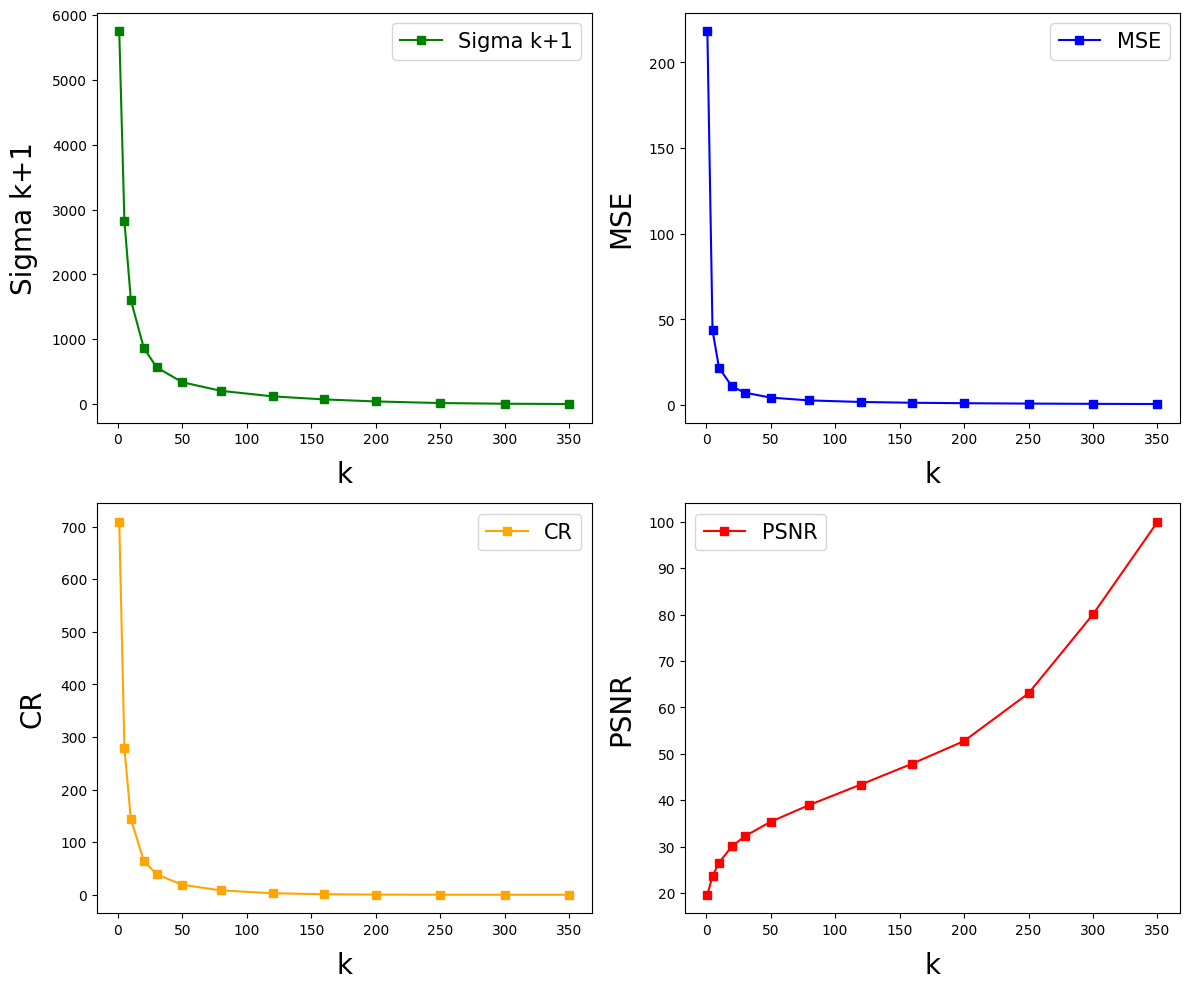

In [36]:
showLinear(table.values, 30)